Imports

In [77]:
import pandas as pd
import numpy as np
import requests
import json
import os
from gazpacho import *
import matplotlib.pyplot as plt
import seaborn as sns 

Website being scraped is a wikipedia webpage that shows the number of cities, towns by each state in austria and their population

In [58]:
#Getting the url
url='https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Austria'
html=get(url)

Create a function that takes in the table number and checks it in the url, Reads in each each data and then returns a dataframe created from it.

In [59]:
def read_table(html,table_number):
    soup=Soup(html)
    #Find the respective table from the webpage as data is split into multiple tables
    tables=soup.find('table')
    table=tables[table_number]
    #Find each row in the respective table
    row=table.find('tr')
    #Find the headers of the table 
    head1=[]
    for r in row:
        header = r.find("th")
        head1.append(header)

    headers = head1[:2]
    headers1 = []
    for h in headers[0]:
        headers1.append(h.text)

    data = []
    for r in row:
        column = r.find("td")
        if(isinstance(column, list)):
            data.append(column)
    # take in each column from the table and check for rowspan
    col1 = []
    i=0
    while(i<len(data)):
        if("rowspan" in data[i][0].attrs):
            rowspan = int(data[i][0].attrs['rowspan'])
        else:
            rowspan=1
        print(rowspan,data[i][0].text,i)
        for j in range(0, rowspan):
            col1.append(data[i][0].text)
        if(rowspan > 1):
            rowspan = rowspan-1
        i = i+(rowspan)
    col2 = []
    i=0
    while(i<len(data)):
        if("rowspan" in data[i][1].attrs):
            rowspan = int(data[i][1].attrs['rowspan'])
        else:
            rowspan=1
        print(rowspan,data[i][1].text,i)
        for j in range(0, rowspan):
            col2.append(data[i][1].text)
        if(rowspan > 1):
            rowspan = rowspan-1
        i = i+(rowspan)
    col3 = []
    i=0
    while(i<len(data)):
        if("rowspan" in data[i][2].attrs):
            rowspan = int(data[i][2].attrs['rowspan'])
        else:
            rowspan=1
        print(rowspan,data[i][2].text,i)
        for j in range(0, rowspan):
            col3.append(data[i][2].text)
        if(rowspan > 1):
            rowspan = rowspan-1
        i = i+(rowspan)
    #Create a dataframe and add each column under the respective header
    return pd.DataFrame({headers1[0]: col1,headers1[1]: col2,headers1[2]: col3})

In [60]:
# create a list with the state name and the table number found from inspecting the webpage
states_and_tables = [("Burgenland", 1),("Carinthia", 2),("Lower Austria", 3),("Salzburg", 4),("Styria", 5),("Tyrol", 6),("Upper Austria", 7),("Vienna", 8),("Vorarlberg", 9)]

# Create a dataset that will encompass all the data
all_data = pd.DataFrame()

# Create a loop to pass in the state name and number while calling the function
for state, table_number in states_and_tables:
    state_df = read_table(html, table_number)
    # Add in a column which says what state that row belongs to
    state_df["State"] = state
    # Add everything to the main dataframe while ignoring Index
    all_data = pd.concat([all_data, state_df], ignore_index=True)


1 Andau 0
1 Antau 1
1 Apetlon 2
1 Bad Sauerbrunn 3
1 Bad Tatzmannsdorf 4
1 Badersdorf 5
1 Baumgarten 6
1 Bernstein 7
1 Bildein 8
1 Bocksdorf 9
1 Breitenbrunn am Neusiedler See 10
1 Bruckneudorf 11
1 Burgauberg-Neudauberg 12
1 Deutsch Jahrndorf 13
1 Deutsch Kaltenbrunn 14
1 Deutsch Schützen-Eisenberg 15
1 Deutschkreutz 16
1 Donnerskirchen 17
1 Draßburg 18
1 Draßmarkt 19
1 Eberau 20
1 Edelstal 21
1 Eisenstadt 22
1 Eltendorf 23
1 Forchtenstein 24
1 Frankenau-Unterpullendorf 25
1 Frauenkirchen 26
1 Gattendorf 27
1 Gerersdorf-Sulz 28
1 Gols 29
1 Grafenschachen 30
1 Großhöflein 31
1 Großmürbisch 32
1 Großpetersdorf 33
1 Großwarasdorf 34
1 Güssing 35
1 Güttenbach 36
1 Hackerberg 37
1 Halbturn 38
1 Hannersdorf 39
1 Heiligenbrunn 40
1 Heiligenkreuz im Lafnitztal 41
1 Heugraben 42
1 Hirm 43
1 Horitschon 44
1 Hornstein 45
1 Illmitz 46
1 Inzenhof 47
1 Jabing 48
1 Jennersdorf 49
1 Jois 50
1 Kaisersdorf 51
1 Kemeten 52
1 Kittsee 53
1 Kleinmürbisch 54
1 Klingenbach 55
1 Kobersdorf 56
1 Kohfidisch 57


In [61]:
all_data.head()

,Name,Designation,Population,State
0,Andau,Market town,"2,285",Burgenland
1,Antau,Other municipality,758,Burgenland
2,Apetlon,Market town,"1,760",Burgenland
3,Bad Sauerbrunn,Other municipality,"2,219",Burgenland
4,Bad Tatzmannsdorf,Other municipality,"1,554",Burgenland


In [62]:
#Find the data types of the columns
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         2097 non-null   object
 1   Designation  2097 non-null   object
 2   Population   2097 non-null   object
 3   State        2097 non-null   object
dtypes: object(4)
memory usage: 65.7+ KB


In [63]:
#Check for null values
all_data.isna().sum()

Name           0
Designation    0
Population     0
State          0
dtype: int64

In [64]:
#Convert all data types to the respective types
all_data["Name"] = all_data["Name"].astype(str)
all_data["Population"] = all_data["Population"].str.replace(',', '').astype(int)
all_data["Designation"] = all_data["Designation"].astype("category") 
all_data["State"] = all_data["State"].astype("category") 

In [65]:
all_data.head()

,Name,Designation,Population,State
0,Andau,Market town,2285,Burgenland
1,Antau,Other municipality,758,Burgenland
2,Apetlon,Market town,1760,Burgenland
3,Bad Sauerbrunn,Other municipality,2219,Burgenland
4,Bad Tatzmannsdorf,Other municipality,1554,Burgenland


In [66]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         2097 non-null   object  
 1   Designation  2097 non-null   category
 2   Population   2097 non-null   int32   
 3   State        2097 non-null   category
dtypes: category(2), int32(1), object(1)
memory usage: 29.4+ KB


In [67]:
#Find summary statistics for the data
all_data.describe()

,Population
count,2.097000e+03
mean,4.218310e+03
std,4.238192e+04
min,2.100000e+01
25%,1.126000e+03
50%,1.820000e+03
75%,3.158000e+03
max,1.888776e+06


There are 2097 entries with a mean population of 4218.3. The max population is 1888776. 

In [70]:
# Save the dataset to an excel file
all_data.to_csv('all_data.csv', index=False)

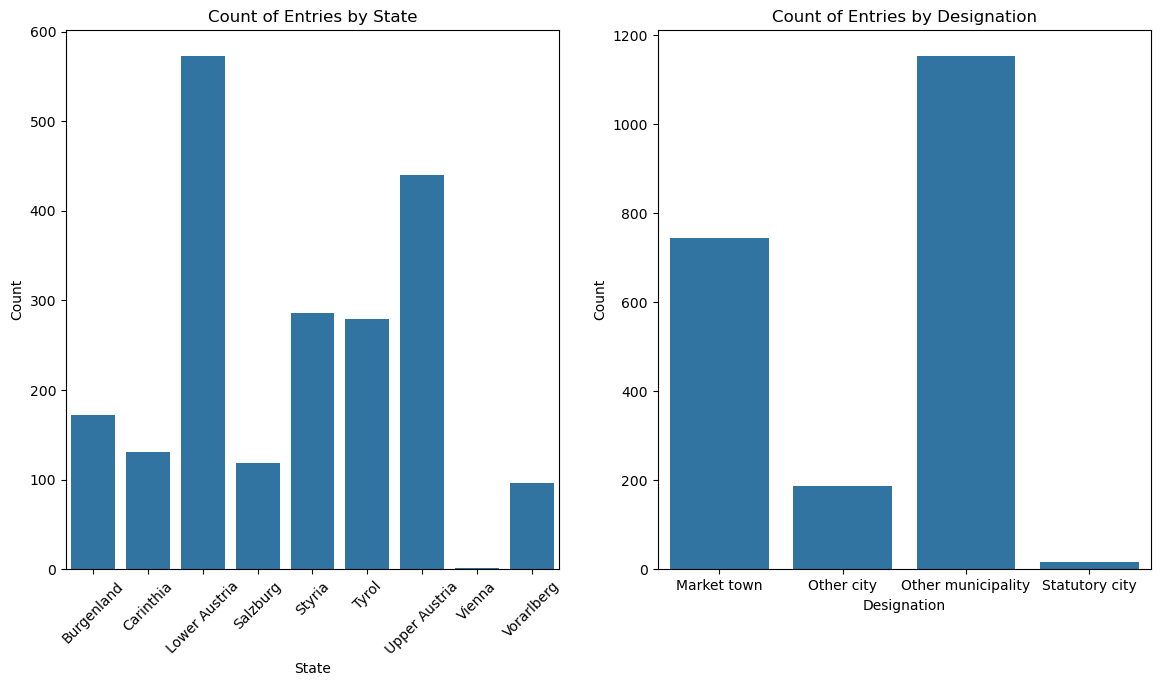

In [117]:
#Create univariate subplots for states and Designation
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Univariate plot for States
sns.countplot(x="State", data=all_data, ax=axs[0])
axs[0].set_title("Count of State")
axs[0].set_xlabel("State")
axs[0].set_ylabel("Count")
axs[0].tick_params(axis='x', rotation=45)
# Univariate plot for Designation
sns.countplot(x="Designation", data=all_data, ax=axs[1])
axs[1].set_title("Count of Designation")
axs[1].set_xlabel("Designation")
axs[1].set_ylabel("Count")

plt.show()

From the two graphs it can be seen that Lower Austria has a much larger count of cities and towns than any other. Vienna only has one. Styria and Tyrol are close to each other. There are also higher number of Municipalities  with the statuory city being the lowest.

C:\Users\vivie\AppData\Local\Temp\ipykernel_20236\4172234788.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_population = all_data.groupby("State")["Population"].sum().reset_index()


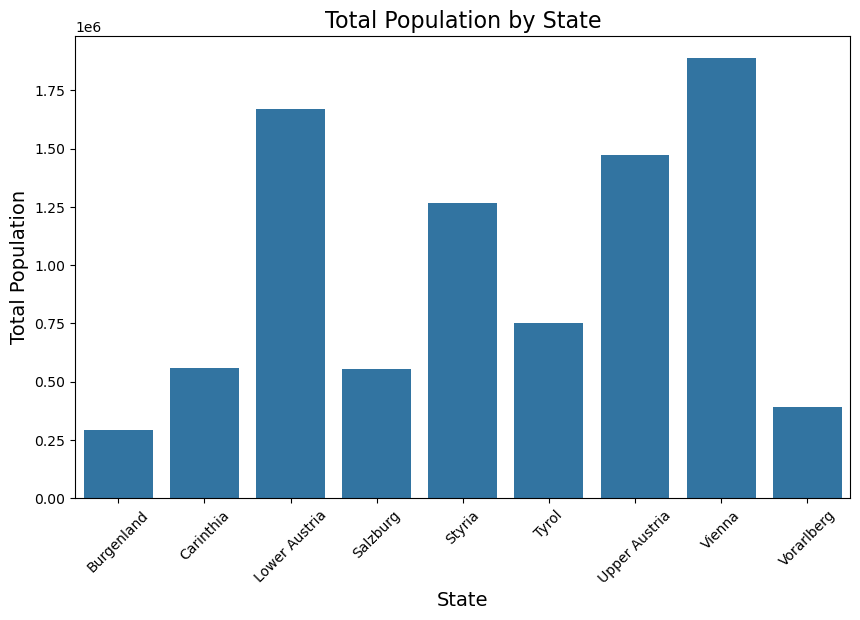

In [121]:
# Group the data by state and then add up the population to find the total population of the state
state_population = all_data.groupby("State")["Population"].sum().reset_index()

# Graph to check whic state has higher population
plt.figure(figsize=(10, 6))
sns.barplot(x="State", y="Population", data=state_population)
plt.title("Total Population by State", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Total Population", fontsize=14)
plt.xticks(rotation=45) 
plt.show()

The graph above shows the population of each state. vienna although it only has one desgnation has a higher population than every other state. This maybe due to tourism and popularity. Lower Austria and Upper Austria are a close to Vienna.

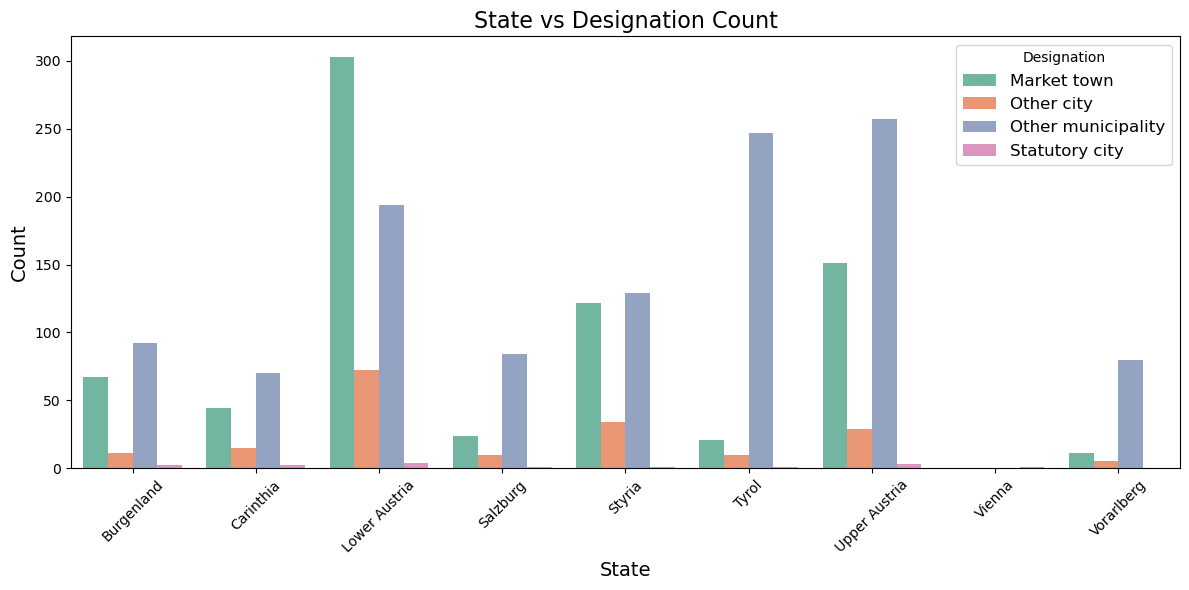

In [109]:
#Plot to check the number of designations such as towns, cities in each state
plt.figure(figsize=(12, 6))
sns.countplot(x="State", hue="Designation", data=all_data, palette="Set2")
plt.title("State vs Designation Count", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Designation", loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()

The above graph shows in each state a specific type of designation prevails over the others, For example, in lower Austria, market towns are more prevalent than Statuory Cities. It also shows that although the state may have a higher number of Designations, the population count may not be that high. Population is not directly influenced by designations numbers rather than by type.